# Convolutional Neural Network

In [3]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  9 15:27:06 2018

@author: guidosidoni

Este archivo sirve para comparar el accuraci de los modelo corridos en el trabajo final de Machine Learning

Future work: probar con algun tipo de regularizacion para eviatr overfiting, 
tambien se puede probar con una ref mas chica o con data augmentation
"""

import os, shutil
from keras import models #to set up the model
from keras import layers #to set up the model
from keras import optimizers #to compile the medel
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
### SPLIT IMAGES into Training, Validation and Testing 

cdw = os.getcwd()

grafitti = cdw + '/311pictures/Grafiti'
trash = cdw + '/311pictures/Trash'

#Directory where I will save the small dataset
base_dir = cdw + '/311pictures/trash_and_grafitti_small/'
if os.path.isdir(base_dir) == False: os.mkdir(base_dir)
#rename images


Copy the images to the corresponding folders

In [4]:
#copy images to the corresponding folders
i = 0
for fname in os.listdir(grafitti):
    print(fname)
    src = os.path.join(grafitti, fname)
    dst = os.path.join(base_dir, 'gra_{}.jpg'.format(i))
    shutil.copyfile(src, dst)
    i = i + 1

i = 0
for fname in os.listdir(trash):
    print(fname)
    src = os.path.join(trash, fname)
    dst = os.path.join(base_dir, 'tra_{}.jpg'.format(i))
    shutil.copyfile(src, dst)
    i = i + 1

Pro-Gra-101001947789.jpg
Pro-Gra-101001954093.jpg
Pro-Gra-101001954087.jpg
Pro-Gra-101001945808.jpg
Pro-Gra-101001947979.jpg
Pro-Gra-101001949001.jpg
Pro-Gra-101001758273.jpg
Pub-PWD-101001249589.jpg
Pub-PWD-101001900029.jpg
Pro-Gra-101001952582.jpg
Pro-Gra-101001954124.jpg
Pro-Gra-101001954118.jpg
Pub-PWD-101001415287.jpg
Pro-Gra-101001950815.jpg
Pro-Gra-101001949377.jpg
Pro-Gra-101001222338.jpg
Pro-Gra-101001198608.jpg
Pro-Gra-101001955004.jpg
Pub-PWD-101001953882.jpg
Pub-PWD-101001850421.jpg
Pro-Gra-101001636622.jpg
Pub-PWD-101001805839.jpg
Pro-Gra-101001946521.jpg
Pro-Gra-101001945996.jpg
Pro-Gra-101001952583.jpg
Pro-Gra-101001951883.jpg
Pro-Gra-101001954045.jpg
Pro-Gra-101001340635.jpg
Pub-PWD-101001954082.jpg
Pro-Gra-101001609559.jpg
Pro-Gra-101001954253.jpg
Pub-PWD-101001172834.jpg
Pub-PWD-101001955363.jpg
Pub-PWD-101001502868.jpg
Pro-Gra-101001954286.jpg
Pub-PWD-101001955361.jpg
Pro-Gra-101001950792.jpg
Pro-Gra-101001346078.jpg
Pro-Gra-101001752205.jpg
Pro-Gra-101001954251.jpg


Pub-PWD-101001249679.jpg
Pro-Gra-101001430495.jpg
Pro-Gra-101001950926.jpg
Pro-Gra-101001597628.jpg
Pro-Gra-101001343839.jpg
Pro-Gra-101001947725.jpg
Pro-Gra-101001855453.jpg
Pro-Gra-101001327159.jpg
Pro-Gra-101001949052.jpg
Pub-PWD-101001375380.jpg
Pro-Gra-101001951796.jpg
Pro-Gra-101001768526.jpg
Pro-Gra-101001196306.jpg
Pro-Gra-101001955241.jpg
Pro-Gra-101001947679.jpg
Pro-Gra-101001951769.jpg
Pub-PWD-101001950467.jpg
Pub-PWD-101001950329.jpg
Pro-Gra-101001430509.jpg
Pub-PWD-101001905315.jpg
Pub-PWD-101001530733.jpg
Pub-PWD-101001947654.jpg
Pub-PWD-101001953621.jpg
Pro-Gra-101001625143.jpg
Pro-Gra-101001949899.jpg
Pro-Gra-101001949655.jpg
Pub-PWD-101001772779.jpg
Pro-Gra-101001953143.jpg
Pro-Gra-101001953631.jpg
Pub-PWD-101001947330.jpg
Pro-Gra-101001951797.jpg
Pub-PWD-101001955708.jpg
Pub-PWD-101001947293.jpg
Pub-PWD-101001607537.jpg
Pro-Gra-101001349656.jpg
Pub-PWD-101001952891.jpg
Pro-Gra-101001948629.jpg
Pub-PWD-101001702842.jpg
Pro-Gra-101001955122.jpg
Pub-PWD-101001249691.jpg


Pub-Emp-101001278710.jpg
Pub-CE -101001681977.jpg
Pub-Emp-101001241634.jpg
Pub-Imp-101001745287.jpg
Pub-CE -101001892527.jpg
Pub-Emp-101001404090.jpg
Pub-Imp-101001904991.jpg
Pub-Imp-101001771095.jpg
Pub-CE -101001548305.jpg
Pub-CE -101001420907.jpg
Pub-Imp-101001798804.jpg
Pub-CE -101001774478.jpg
Pub-Imp-101001807042.jpg
Pub-Imp-101001925208.jpg
Pub-Imp-101001842287.jpg
Pub-CE -101001579494.jpg
Pub-CE -101001899128.jpg
Pub-Imp-101001931280.jpg
Pub-Imp-101001852733.jpg
Pub-CE -101001781829.jpg
Pub-CE -101001546302.jpg
Pub-Emp-101001878739.jpg
Pub-Imp-101001881755.jpg
Pub-Imp-101001880305.jpg
Pub-Imp-101001851986.jpg
Pub-Imp-101001911226.jpg
Pub-CE -101001899909.jpg
Pub-Emp-101001717320.jpg
Pub-CE -101001809467.jpg
Pub-CE -101001901991.jpg
Pub-CE -101001801991.jpg
Pub-CE -101001842664.jpg
Pub-Imp-101001886371.jpg
Pub-CE -101001899908.jpg
Pub-CE -101001875988.jpg
Pub-Imp-101001842119.jpg
Pub-CE -101001867181.jpg
Pub-CE -101001350896.jpg
Pub-CE -101001545187.jpg
Pub-CE -101001406055.jpg


Dividing the images into Training, Validation and Training

In [3]:
#directory for the training, validation and test split
train_dir = os.path.join(base_dir, 'train')
if os.path.isdir(train_dir) == False: os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if os.path.isdir(validation_dir) == False: os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if os.path.isdir(test_dir) == False: os.mkdir(test_dir)
    

#directory with training trash pictures 
train_trash_dir = os.path.join(train_dir, 'trash')
if os.path.isdir(train_trash_dir) == False: os.mkdir(train_trash_dir)

#directory with training grafitti pictures 
train_gra_dir = os.path.join(train_dir, 'grafitti')
if os.path.isdir(train_gra_dir) == False: os.mkdir(train_gra_dir)

#directory with validation trash pictures 
validation_trash_dir = os.path.join(validation_dir, 'trash')
if os.path.isdir(validation_trash_dir) == False: os.mkdir(validation_trash_dir)

#directory with validation grafitti pictures 
validation_gra_dir = os.path.join(validation_dir, 'grafitii')
if os.path.isdir(validation_gra_dir) == False: os.mkdir(validation_gra_dir)

#directory with test trash pictures 
test_trash_dir = os.path.join(test_dir, 'trash')
if os.path.isdir(test_trash_dir) == False: os.mkdir(test_trash_dir)

#directory with test grafitti pictures 
test_gra_dir = os.path.join(test_dir, 'grafitti')
if os.path.isdir(test_gra_dir) == False: os.mkdir(test_gra_dir)

#COPY IMAGES TO THE CORRESPONDING DIRECTORIES
original_dataset_dir = base_dir


In [6]:
#Copies the first 412 trash images to train_trash_dir
fnames = ['tra_{}.jpg'.format(i) for i in range(412)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_trash_dir, fname)
    shutil.copyfile(src, dst)
    
#copy  the next 25% trash images to validation_trash_dir
fnames = ['tra_{}.jpg'.format(i) for i in range(412, 550)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_trash_dir, fname)
    shutil.copyfile(src, dst)
    

#Copies the first 412 grafitti images to train_grafitti_dir
fnames = ['gra_{}.jpg'.format(i) for i in range(412)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_gra_dir, fname)
    shutil.copyfile(src, dst)
    
#copy  the next %25 grafitti images to validation_grafitti_dir
fnames = ['gra_{}.jpg'.format(i) for i in range(412, 550)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_gra_dir, fname)
    shutil.copyfile(src, dst)


In [4]:
#PLOTING THE OUTPUT

def plotResults():

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Valiudation acc')     
    plt.title('Training and validation accuracy')   
    plt.legend() 

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

## Seting a Baseline CNN Model

In [13]:
model = models.Sequential()
model.add(layers.Conv2D( 32, (5,5), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(3,3))   

model.add(layers.Conv2D( 64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(3,3))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#MODEL OPTIMIZATION

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
__________

In [ ]:
#Defining Data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

#FIT MODEL --> RUN
history = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=7)

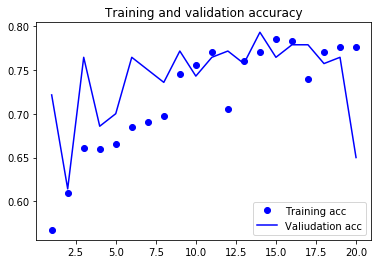

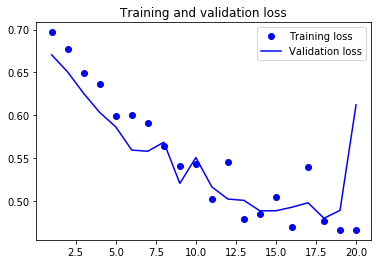

In [20]:
plotResults()

# Seting an Overfiting Model

In [25]:
#MODELS SET-UP
model = models.Sequential()
model.add(layers.Conv2D( 32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#MODEL OPTIMIZATION

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [26]:
#FIT MODEL --> RUN
history = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=40,
        validation_data=validation_generator,
        validation_steps=7)

Epoch 1/40
20/20 [==============================] - 27s 1s/step - loss: 0.6955 - acc: 0.5571 - val_loss: 0.6764 - val_acc: 0.5357
Epoch 2/40
20/20 [==============================] - 22s 1s/step - loss: 0.6768 - acc: 0.5800 - val_loss: 0.6468 - val_acc: 0.6143
Epoch 3/40
20/20 [==============================] - 27s 1s/step - loss: 0.6464 - acc: 0.6525 - val_loss: 0.6234 - val_acc: 0.7357
Epoch 4/40
20/20 [==============================] - 20s 980ms/step - loss: 0.6059 - acc: 0.7019 - val_loss: 0.7631 - val_acc: 0.5286
Epoch 5/40
20/20 [==============================] - 23s 1s/step - loss: 0.6277 - acc: 0.6548 - val_loss: 0.5890 - val_acc: 0.7429
Epoch 6/40
20/20 [==============================] - 22s 1s/step - loss: 0.5916 - acc: 0.7100 - val_loss: 0.5692 - val_acc: 0.7500
Epoch 7/40
20/20 [==============================] - 26s 1s/step - loss: 0.5591 - acc: 0.7149 - val_loss: 0.5732 - val_acc: 0.6929
Epoch 8/40
20/20 [==============================] - 21s 1s/step - loss: 0.5727 - acc: 0

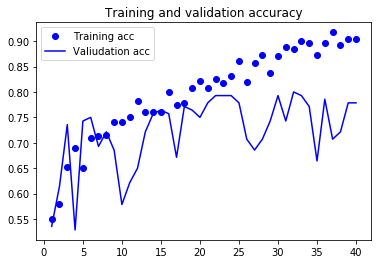

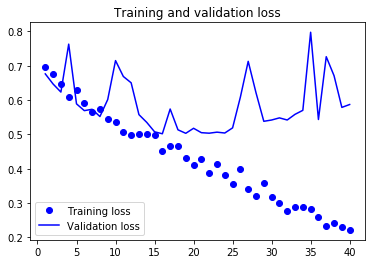

In [27]:
plotResults()

# Model that avoid Overfiting

In [31]:
#re-defining image iterator to add data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

test_datagen  = ImageDataGenerator(rescale=1./255)

In [30]:
#MODELS SET-UP
model = models.Sequential()
model.add(layers.Conv2D( 32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #adding drop out
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#MODEL OPTIMIZATION

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [32]:


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

#FIT MODEL --> RUN
history = model.fit_generator(
        train_generator,
        steps_per_epoch=40,
        epochs=40,
        validation_data=validation_generator,
        validation_steps=7)

Found 824 images belonging to 2 classes.
Found 276 images belonging to 2 classes.
Epoch 1/40
40/40 [==============================] - 52s 1s/step - loss: 0.6866 - acc: 0.5439 - val_loss: 0.6626 - val_acc: 0.5357
Epoch 2/40
40/40 [==============================] - 49s 1s/step - loss: 0.6737 - acc: 0.5713 - val_loss: 0.6482 - val_acc: 0.5714
Epoch 3/40
40/40 [==============================] - 51s 1s/step - loss: 0.6684 - acc: 0.6174 - val_loss: 0.5993 - val_acc: 0.6857
Epoch 4/40
40/40 [==============================] - 48s 1s/step - loss: 0.6519 - acc: 0.5915 - val_loss: 0.5473 - val_acc: 0.8143
Epoch 5/40
40/40 [==============================] - 52s 1s/step - loss: 0.6340 - acc: 0.6376 - val_loss: 0.5565 - val_acc: 0.6857
Epoch 6/40
40/40 [==============================] - 54s 1s/step - loss: 0.6312 - acc: 0.6500 - val_loss: 0.5036 - val_acc: 0.8214
Epoch 7/40
40/40 [==============================] - 56s 1s/step - loss: 0.6205 - acc: 0.6623 - val_loss: 0.5094 - val_acc: 0.7786
Epoch 8/

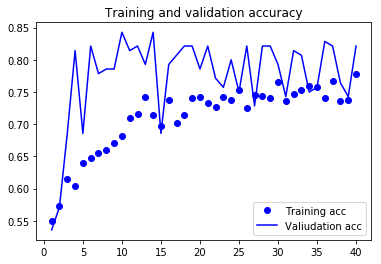

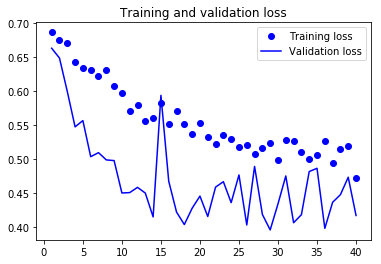

In [33]:
plotResults()

## Using a grater batch size

In [6]:
#re-defining image iterator to add data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

test_datagen  = ImageDataGenerator(rescale=1./255)

In [4]:
#MODELS SET-UP
model = models.Sequential()
model.add(layers.Conv2D( 32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))   

model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #adding drop out
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#MODEL OPTIMIZATION

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
?optimizers.RMSprop()

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=50)

Found 824 images belonging to 2 classes.
Found 276 images belonging to 2 classes.
Epoch 1/40
100/100 [==============================] - 230s 2s/step - loss: 0.6665 - acc: 0.5926 - val_loss: 0.5874 - val_acc: 0.6877
Epoch 2/40
100/100 [==============================] - 228s 2s/step - loss: 0.6262 - acc: 0.6478 - val_loss: 0.5650 - val_acc: 0.7000
Epoch 3/40
100/100 [==============================] - 224s 2s/step - loss: 0.5945 - acc: 0.6932 - val_loss: 0.5386 - val_acc: 0.7344
Epoch 4/40
100/100 [==============================] - 220s 2s/step - loss: 0.5690 - acc: 0.7150 - val_loss: 0.5331 - val_acc: 0.7130
Epoch 5/40
100/100 [==============================] - 220s 2s/step - loss: 0.5406 - acc: 0.7254 - val_loss: 0.4566 - val_acc: 0.8032
Epoch 6/40
100/100 [==============================] - 217s 2s/step - loss: 0.5536 - acc: 0.7236 - val_loss: 0.5322 - val_acc: 0.7117
Epoch 7/40
100/100 [==============================] - 217s 2s/step - loss: 0.5365 - acc: 0.7245 - val_loss: 0.4704 - val

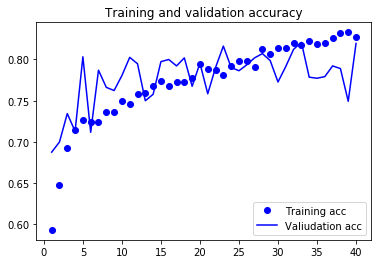

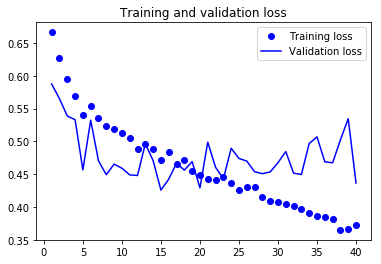

In [10]:
plotResults()